# #IMPORT THE LIBRARIES REQUIRED

In [0]:
import xlwt 
from google.colab import files
import io
from xlwt import Workbook 
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

NOW WE FIRST IMPORT THE LIBRARIES WHICH ARE REQUIRED

In [0]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import keras 
from keras.models import Sequential
from keras.layers import Dense

uploading the dataset for antenna frequency and dimensions

In [326]:
d = pd.read_csv('DATASET_ANTENNA.csv')
X = d[d.columns[0:2]].values
y = d[d.columns[2:4]]
print(y.shape)


(51, 2)


Normalizing

In [0]:
X=X/10
y=y/1000

WE CREATE OUR MODEL IN WHICH WE HAVE  2 NURON IN INPIUT LAYER, WE USE THREE HIDDEN LAYER OF NUMBER OF NODES 
7,5,2 AND ONE NODE AT THE OUTPUT.

In [0]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)




In [329]:
model = Sequential()
model.add(Dense(7, activation='relu',input_dim = 2))
model.add(Dense(5, activation='relu'))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 7)                 21        
_________________________________________________________________
dense_29 (Dense)             (None, 5)                 40        
_________________________________________________________________
dense_30 (Dense)             (None, 2)                 12        
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
None


In [330]:
print(type(X_test))

<class 'numpy.ndarray'>


HERE WE SET THE OPTIMIZER, LOSS FUNCTION BATCH_SIZE AND EPOCHS FOR GIVEN MODEL.

Train on 40 samples, validate on 11 samples
Epoch 1/100
40/40 [==============================] - 1s 19ms/step - loss: 0.0508 - val_loss: 0.0517
Epoch 2/100
40/40 [==============================] - 0s 180us/step - loss: 0.0485 - val_loss: 0.0489
Epoch 3/100
40/40 [==============================] - 0s 124us/step - loss: 0.0458 - val_loss: 0.0460
Epoch 4/100
40/40 [==============================] - 0s 80us/step - loss: 0.0430 - val_loss: 0.0431
Epoch 5/100
40/40 [==============================] - 0s 104us/step - loss: 0.0402 - val_loss: 0.0402
Epoch 6/100
40/40 [==============================] - 0s 98us/step - loss: 0.0375 - val_loss: 0.0374
Epoch 7/100
40/40 [==============================] - 0s 102us/step - loss: 0.0348 - val_loss: 0.0347
Epoch 8/100
40/40 [==============================] - 0s 78us/step - loss: 0.0323 - val_loss: 0.0321
Epoch 9/100
40/40 [==============================] - 0s 108us/step - loss: 0.0298 - val_loss: 0.0296
Epoch 10/100
40/40 [==============================]

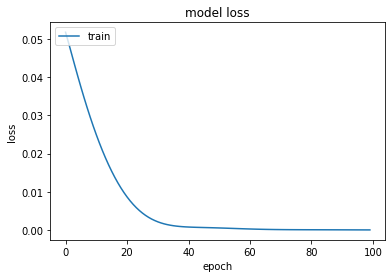

In [331]:


history = model.fit(X_train, y_train, batch_size=100,epochs=300,verbose=1,validation_data=(X_test, y_test))

print(history.history.keys())
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

model.save('model.h5')

In [0]:
result=model.predict(X_test)

Result array obtained

In [333]:
result

array([[0.00638971, 0.01098653],
       [0.0142553 , 0.01556463],
       [0.01069755, 0.01378859],
       [0.02721945, 0.02316631],
       [0.00547848, 0.01056422],
       [0.00547848, 0.01056422],
       [0.02194653, 0.02031628],
       [0.00867436, 0.01225735],
       [0.00383035, 0.00954601],
       [0.00748848, 0.01166535],
       [0.00949844, 0.01276646]], dtype=float32)

In [334]:
y_test

,17.7,13.34
29,0.017859,0.013901
11,0.018800,0.014850
10,0.018800,0.014350
22,0.021800,0.017850
2,0.017700,0.013850
28,0.017832,0.013876
45,0.021225,0.016937
32,0.018039,0.014061
26,0.017691,0.013751
4,0.017700,0.014150


In [335]:
print(result.shape)

(11, 2)


In [336]:
X_test

array([[0.477, 0.485],
       [0.449, 0.455],
       [0.461, 0.47 ],
       [0.402, 0.404],
       [0.48 , 0.489],
       [0.48 , 0.489],
       [0.421, 0.427],
       [0.469, 0.476],
       [0.486, 0.495],
       [0.473, 0.481],
       [0.466, 0.473]])

In [337]:
print(X_test.shape)


(11, 2)


Scatter plot of result and test data for Length and width

In [0]:
#plt.scatter(range(11),result,c='r')
#plt.scatter(range(11),y_test,c='g')
#plt.scatter(range(11),y_test,result.iloc[:,0].values,c='g')
#plt.scatter(result[:, 0], result[:, 1], color ='r')
#plt.scatter(y_test[2:4], color ='g')
#plt.show()
#from matplotlib import pyplot as plt
#result = np.matrix(np.random.rand(11,2))
#y_test = np.matrix(np.random.rand(11,2))
#plt.scatter(result[:, 0], result[:, 1],'o',c='r')
#plt.plot(y_test[:, 0], y_test[:, 1],'o',c='g')

#plt.legend()
#plt.show()
#for width
#plt.scatter(range(11),result[:,1],c='r')
#plt.scatter(range(11),y_test,c='g')

#plt.scatter(range(11),z_test,c='g')
#plt.show()

input lower and higher cutoff frequency

In [346]:
f1=input('Lower Frequency')#divided by 10 e.g-4.5/10=0.45
f2=input('Higher Frequency')#divided by 10 e.g-4.56/10=0.456
arr=np.array([[f1,f2]])
print(arr.shape)



Lower Frequency0.45
Higher Frequency0.456
(1, 2)


In [0]:

res=model.predict(arr)*1000

Predicted dimensions of antenna

In [348]:
res[:,0]
print(res[:,0],'(mm)Predicted Length')
res[:,1]
print(res[:,1],'(mm)Predicted Width')

[13.980612] (mm)Predicted Length
[15.394904] (mm)Predicted Width
